In [20]:
import networkx as nx
import matplotlib.pyplot as plt

In [40]:

# Read the edge list from the file
wildbird = nx.read_edgelist(
    r'C:\Users\Banu\Documents\GitHub\CUNY-DATA-620-WebAnalytics\Week3\aves-wildbird-network-4\aves-wildbird-network-4.edges', 
    nodetype=int, 
    data=(('weight', float),)  # Change int to float
)

# Print the number of nodes and edges to verify the graph was loaded correctly
print(f"Number of nodes: {wildbird.number_of_nodes()}")
print(f"Number of edges: {wildbird.number_of_edges()}")                               

Number of nodes: 135
Number of edges: 2009


Diameter of the graph: 7


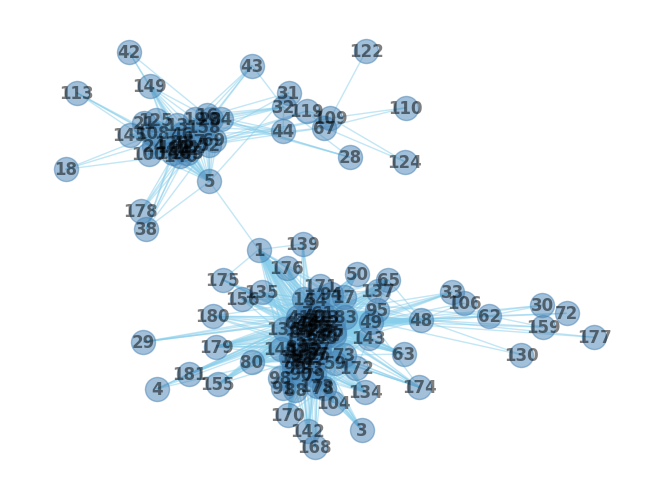

In [50]:

nx.draw(wildbird, with_labels=True, node_color="steelblue", node_size=300, font_weight='bold', 
        edge_color="skyblue", alpha=0.5)

 
# Check if the graph is connected
if not nx.is_connected(wildbird):
    # Find all connected components
    components = list(nx.connected_components(wildbird))
    print(f"Number of connected components: {len(components)}")
    
    # Connect the components by adding edges
    for i in range(len(components) - 1):
        # Get a node from the current component and the next component
        node1 = list(components[i])[0]
        node2 = list(components[i + 1])[0]
        # Add an edge between these nodes
        wildbird.add_edge(node1, node2)
    print("Graph is now connected.")

# Calculate the diameter of the graph
diameter = nx.diameter(wildbird)
print(f"Diameter of the graph: {diameter}")


In [42]:

# Find isolated nodes
isolated_nodes = list(nx.isolates(wildbird))
print(f"Isolated nodes: {isolated_nodes}")

# Find all connected components
components = list(nx.connected_components(wildbird))
print(f"Number of connected components: {len(components)}")

print(components)

# Calculate the density of the graph
density = nx.density(wildbird)
print(f"Density of the graph: {density}")

Isolated nodes: []
Number of connected components: 1
[{1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 52, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 69, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 104, 106, 108, 109, 110, 113, 119, 122, 124, 125, 126, 130, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 149, 153, 155, 156, 157, 158, 159, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181}]
Density of the graph: 0.2222222222222222


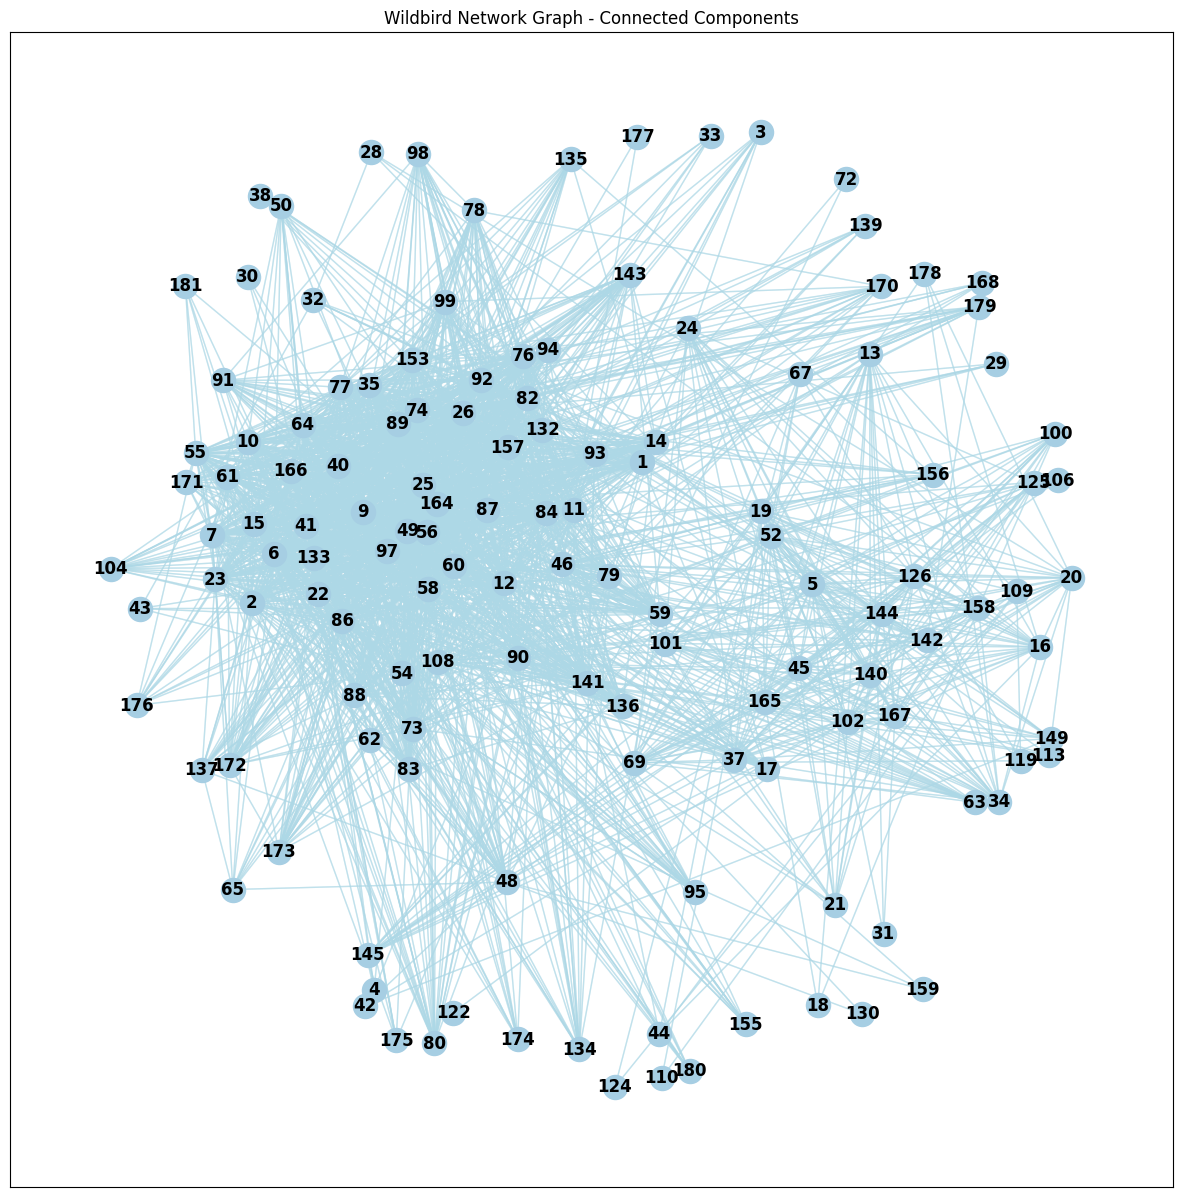

In [49]:
import numpy as np  # Import numpy
# Visualize each connected component with a different color
pos = nx.spring_layout(wildbird, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(15, 15))  # Increase the figure size

colors = plt.cm.Paired(np.linspace(0, 1, len(components)))
    
for i, component in enumerate(components):
    nx.draw_networkx_nodes(wildbird, pos, nodelist=component, node_color=[colors[i]], node_size=300)
    nx.draw_networkx_edges(wildbird, pos, edgelist=[(u, v) for u in component for v in wildbird.neighbors(u) if v in component], edge_color='lightblue', alpha=0.5)
    
nx.draw_networkx_labels(wildbird, pos, font_weight='bold')
plt.title("Wildbird Network Graph - Connected Components")
plt.show()

Diameter of the subgraph: 2
Density of the subgraph: 0.8


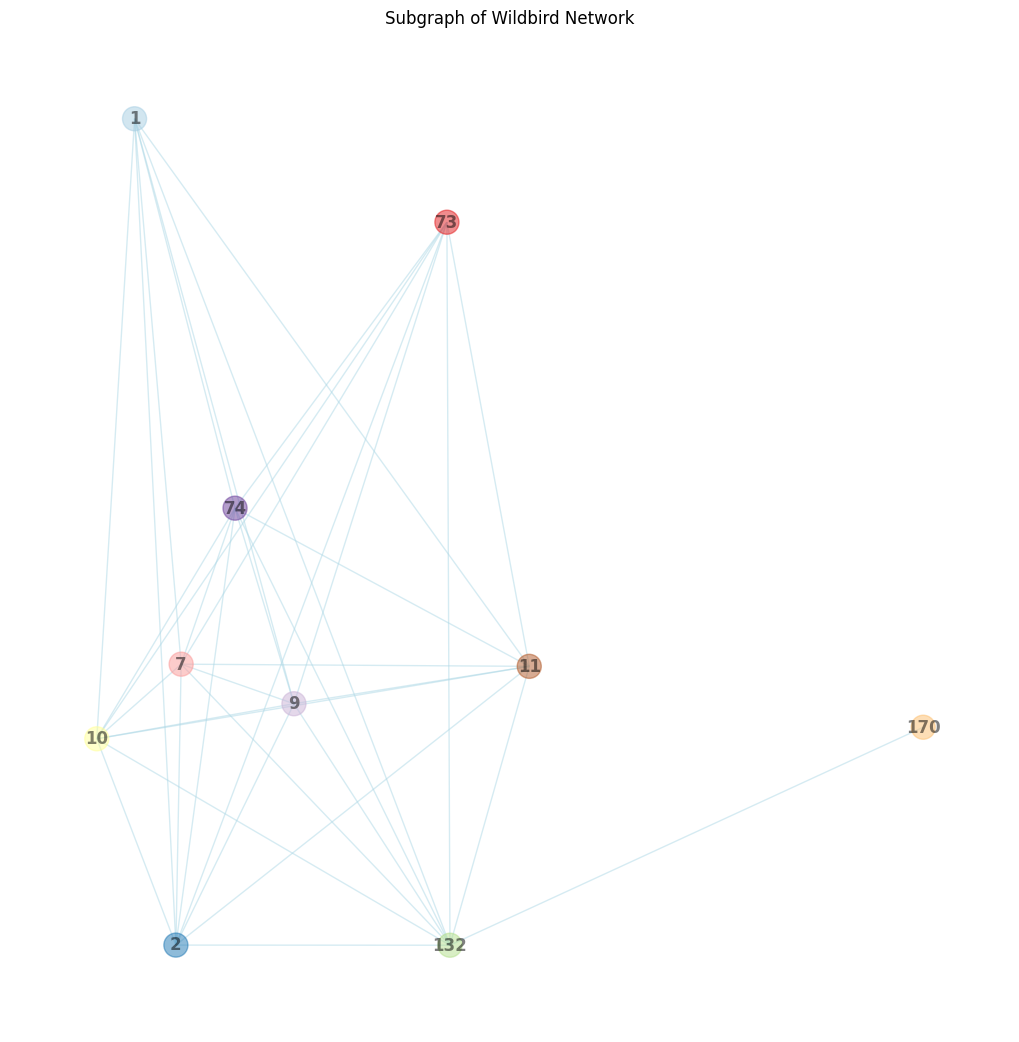

In [51]:
# Select a subset of nodes for the subgraph (e.g., first 10 nodes)
subgraph_nodes = list(wildbird.nodes())[:10]

# Create the subgraph
subgraph = wildbird.subgraph(subgraph_nodes)

# Analyze the subgraph
subgraph_diameter = nx.diameter(subgraph)
subgraph_density = nx.density(subgraph)
print(f"Diameter of the subgraph: {subgraph_diameter}")
print(f"Density of the subgraph: {subgraph_density}")

# Visualize the subgraph
pos = nx.spring_layout(subgraph, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(10, 10))  # Increase the figure size

# Use a lighter colormap
colors = plt.cm.Paired(np.linspace(0, 1, len(subgraph_nodes)))

nx.draw(subgraph, pos, with_labels=True, node_color=colors, node_size=300, font_weight='bold', 
        edge_color='lightblue', alpha=0.5)
plt.title("Subgraph of Wildbird Network")
plt.show()

In [ ]:
# Degree Centrality
degree_centrality = nx.degree_centrality(wildbird)
print("Degree Centrality:")
print(degree_centrality)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(wildbird)
print("Betweenness Centrality:")
print(betweenness_centrality)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(wildbird)
print("Closeness Centrality:")
print(closeness_centrality)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(wildbird)
print("Eigenvector Centrality:")
print(eigenvector_centrality)

# Clustering Coefficient
clustering_coefficient = nx.clustering(wildbird)
print("Clustering Coefficient:")
print(clustering_coefficient)

# Average Path Length
average_path_length = nx.average_largest_path_length(wildbird)
print(f"Average Path Length: {average_path_length}")

# Assortativity
assortativity = nx.degree_assortativity_coefficient(wildbird)
print(f"Assortativity: {assortativity}")

Degree Centrality:
{132: 0.43283582089552236, 1: 0.29850746268656714, 2: 0.4253731343283582, 170: 0.11940298507462686, 73: 0.3731343283582089, 7: 0.39552238805970147, 9: 0.47761194029850745, 74: 0.44776119402985076, 10: 0.4253731343283582, 11: 0.4626865671641791, 12: 0.417910447761194, 98: 0.20149253731343283, 15: 0.44029850746268656, 77: 0.4253731343283582, 153: 0.44776119402985076, 87: 0.417910447761194, 78: 0.22388059701492538, 79: 0.27611940298507465, 141: 0.31343283582089554, 54: 0.31343283582089554, 64: 0.43283582089552236, 56: 0.47014925373134325, 171: 0.16417910447761194, 82: 0.43283582089552236, 55: 0.43283582089552236, 35: 0.40298507462686567, 58: 0.47014925373134325, 172: 0.2462686567164179, 22: 0.4626865671641791, 23: 0.40298507462686567, 84: 0.417910447761194, 59: 0.35074626865671643, 26: 0.4925373134328358, 6: 0.5298507462686567, 86: 0.4626865671641791, 40: 0.40298507462686567, 164: 0.44776119402985076, 166: 0.41044776119402987, 89: 0.5074626865671642, 90: 0.3134328358208

In [54]:
import pandas as pd  # Import pandas
# Calculate network metrics
degree_centrality = nx.degree_centrality(wildbird)
betweenness_centrality = nx.betweenness_centrality(wildbird)
closeness_centrality = nx.closeness_centrality(wildbird)
eigenvector_centrality = nx.eigenvector_centrality(wildbird)
clustering_coefficient = nx.clustering(wildbird)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Node': list(wildbird.nodes()),
    'Degree Centrality': [degree_centrality[node] for node in wildbird.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in wildbird.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in wildbird.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in wildbird.nodes()],
    'Clustering Coefficient': [clustering_coefficient[node] for node in wildbird.nodes()]
})

# Set the 'Node' column as the index
metrics_df.set_index('Node', inplace=True)

# Display the DataFrame
print(metrics_df)


# Find the bird with the highest degree centrality
most_interacted_bird = metrics_df['Degree Centrality'].idxmax()
highest_degree_centrality = metrics_df['Degree Centrality'].max()

print(f"The bird with the highest degree centrality is: {most_interacted_bird}")
print(f"Highest Degree Centrality value: {highest_degree_centrality}")

      Degree Centrality  Betweenness Centrality  Closeness Centrality  \
Node                                                                    
132            0.432836                0.009313              0.501873   
1              0.298507                0.435741              0.549180   
2              0.425373                0.013106              0.501873   
170            0.119403                0.000000              0.362162   
73             0.373134                0.001440              0.416149   
...                 ...                     ...                   ...   
124            0.014925                0.000000              0.209048   
110            0.014925                0.000000              0.209048   
130            0.014925                0.000000              0.333333   
113            0.029851                0.000000              0.316038   
122            0.007463                0.000000              0.208723   

      Eigenvector Centrality  Clustering Coefficie

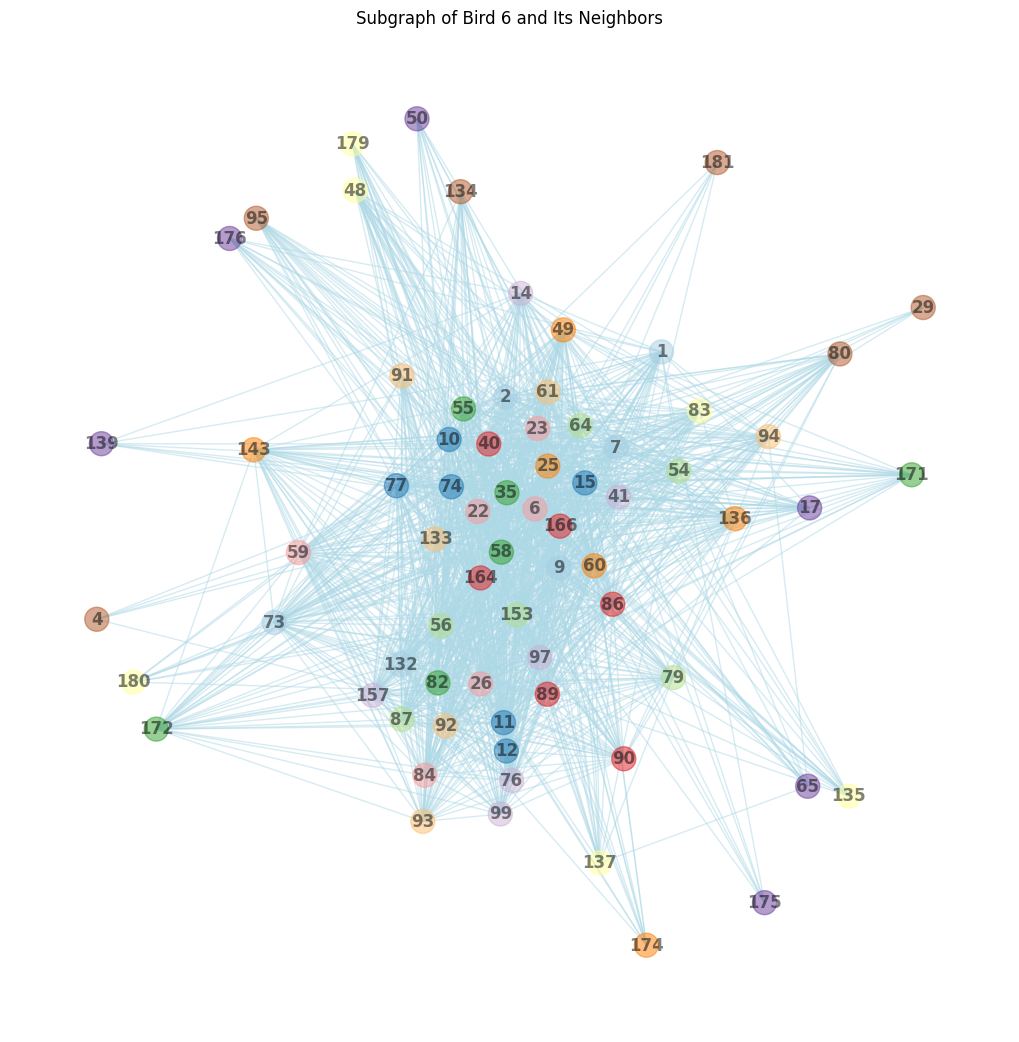

In [55]:
# Select the bird and its neighbors for the subgraph (e.g., bird 6)
bird = 6
neighbors = list(wildbird.neighbors(bird))
subgraph_nodes = [bird] + neighbors

# Create the subgraph
subgraph = wildbird.subgraph(subgraph_nodes)

# Visualize the subgraph
pos = nx.spring_layout(subgraph, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(10, 10))  # Increase the figure size

# Use a lighter colormap
colors = plt.cm.Paired(np.linspace(0, 1, len(subgraph_nodes)))

nx.draw(subgraph, pos, with_labels=True, node_color=colors, node_size=300, font_weight='bold', 
        edge_color='lightblue', alpha=0.5)
plt.title(f"Subgraph of Bird {bird} and Its Neighbors")
plt.show()

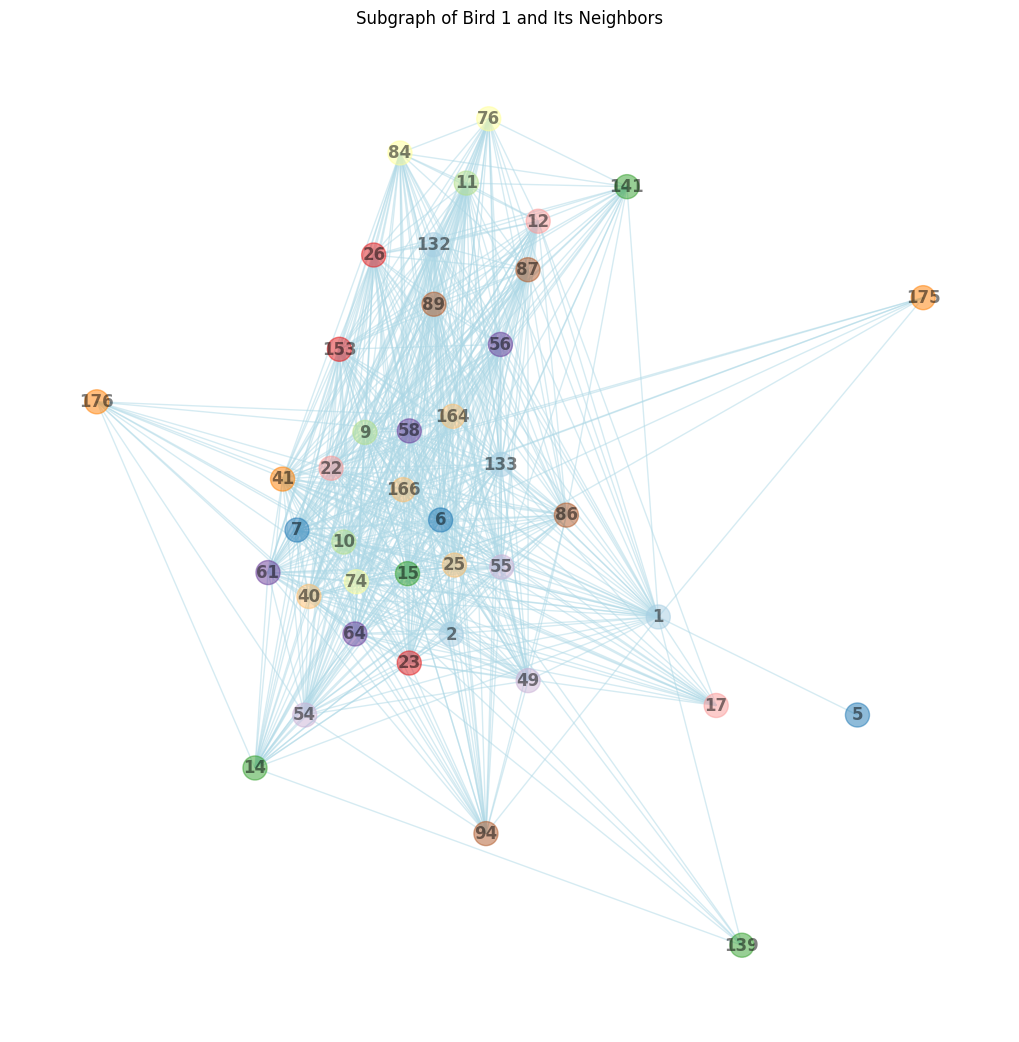

In [65]:
# Select the bird and its neighbors for the subgraph (e.g., bird 6)
bird = 1
neighbors = list(wildbird.neighbors(bird))
subgraph_nodes = [bird] + neighbors

# Create the subgraph
subgraph = wildbird.subgraph(subgraph_nodes)

# Visualize the subgraph
pos = nx.spring_layout(subgraph, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(10, 10))  # Increase the figure size

# Use a lighter colormap
colors = plt.cm.Paired(np.linspace(0, 1, len(subgraph_nodes)))

nx.draw(subgraph, pos, with_labels=True, node_color=colors, node_size=300, font_weight='bold', 
        edge_color='lightblue', alpha=0.5)
plt.title(f"Subgraph of Bird {bird} and Its Neighbors")
plt.show()

In [56]:
# Find the top 5 birds for each measure
top_5_degree = metrics_df.nlargest(5, 'Degree Centrality')
top_5_betweenness = metrics_df.nlargest(5, 'Betweenness Centrality')
top_5_closeness = metrics_df.nlargest(5, 'Closeness Centrality')
top_5_eigenvector = metrics_df.nlargest(5, 'Eigenvector Centrality')
top_5_clustering = metrics_df.nlargest(5, 'Clustering Coefficient')

# Print the top 5 birds for each measure
print("Top 5 birds based on Degree Centrality:")
print(top_5_degree)
print("\nTop 5 birds based on Betweenness Centrality:")
print(top_5_betweenness)
print("\nTop 5 birds based on Closeness Centrality:")
print(top_5_closeness)
print("\nTop 5 birds based on Eigenvector Centrality:")
print(top_5_eigenvector)
print("\nTop 5 birds based on Clustering Coefficient:")
print(top_5_clustering)

Top 5 birds based on Degree Centrality:
      Degree Centrality  Betweenness Centrality  Closeness Centrality  \
Node                                                                    
6              0.529851                0.031592              0.529644   
89             0.507463                0.021200              0.521401   
26             0.492537                0.020263              0.517375   
60             0.485075                0.012930              0.445183   
97             0.485075                0.009694              0.445183   

      Eigenvector Centrality  Clustering Coefficient  
Node                                                  
6                   0.153511                0.543260  
89                  0.155115                0.605795  
26                  0.153929                0.635431  
60                  0.148662                0.610096  
97                  0.151726                0.636538  

Top 5 birds based on Betweenness Centrality:
      Degree Cent

Top 5 nodes with the shortest paths from node 6:
     Node  Shortest Path Length
132   124                     5
133   110                     5
134   122                     5
123   178                     4
124    32                     4


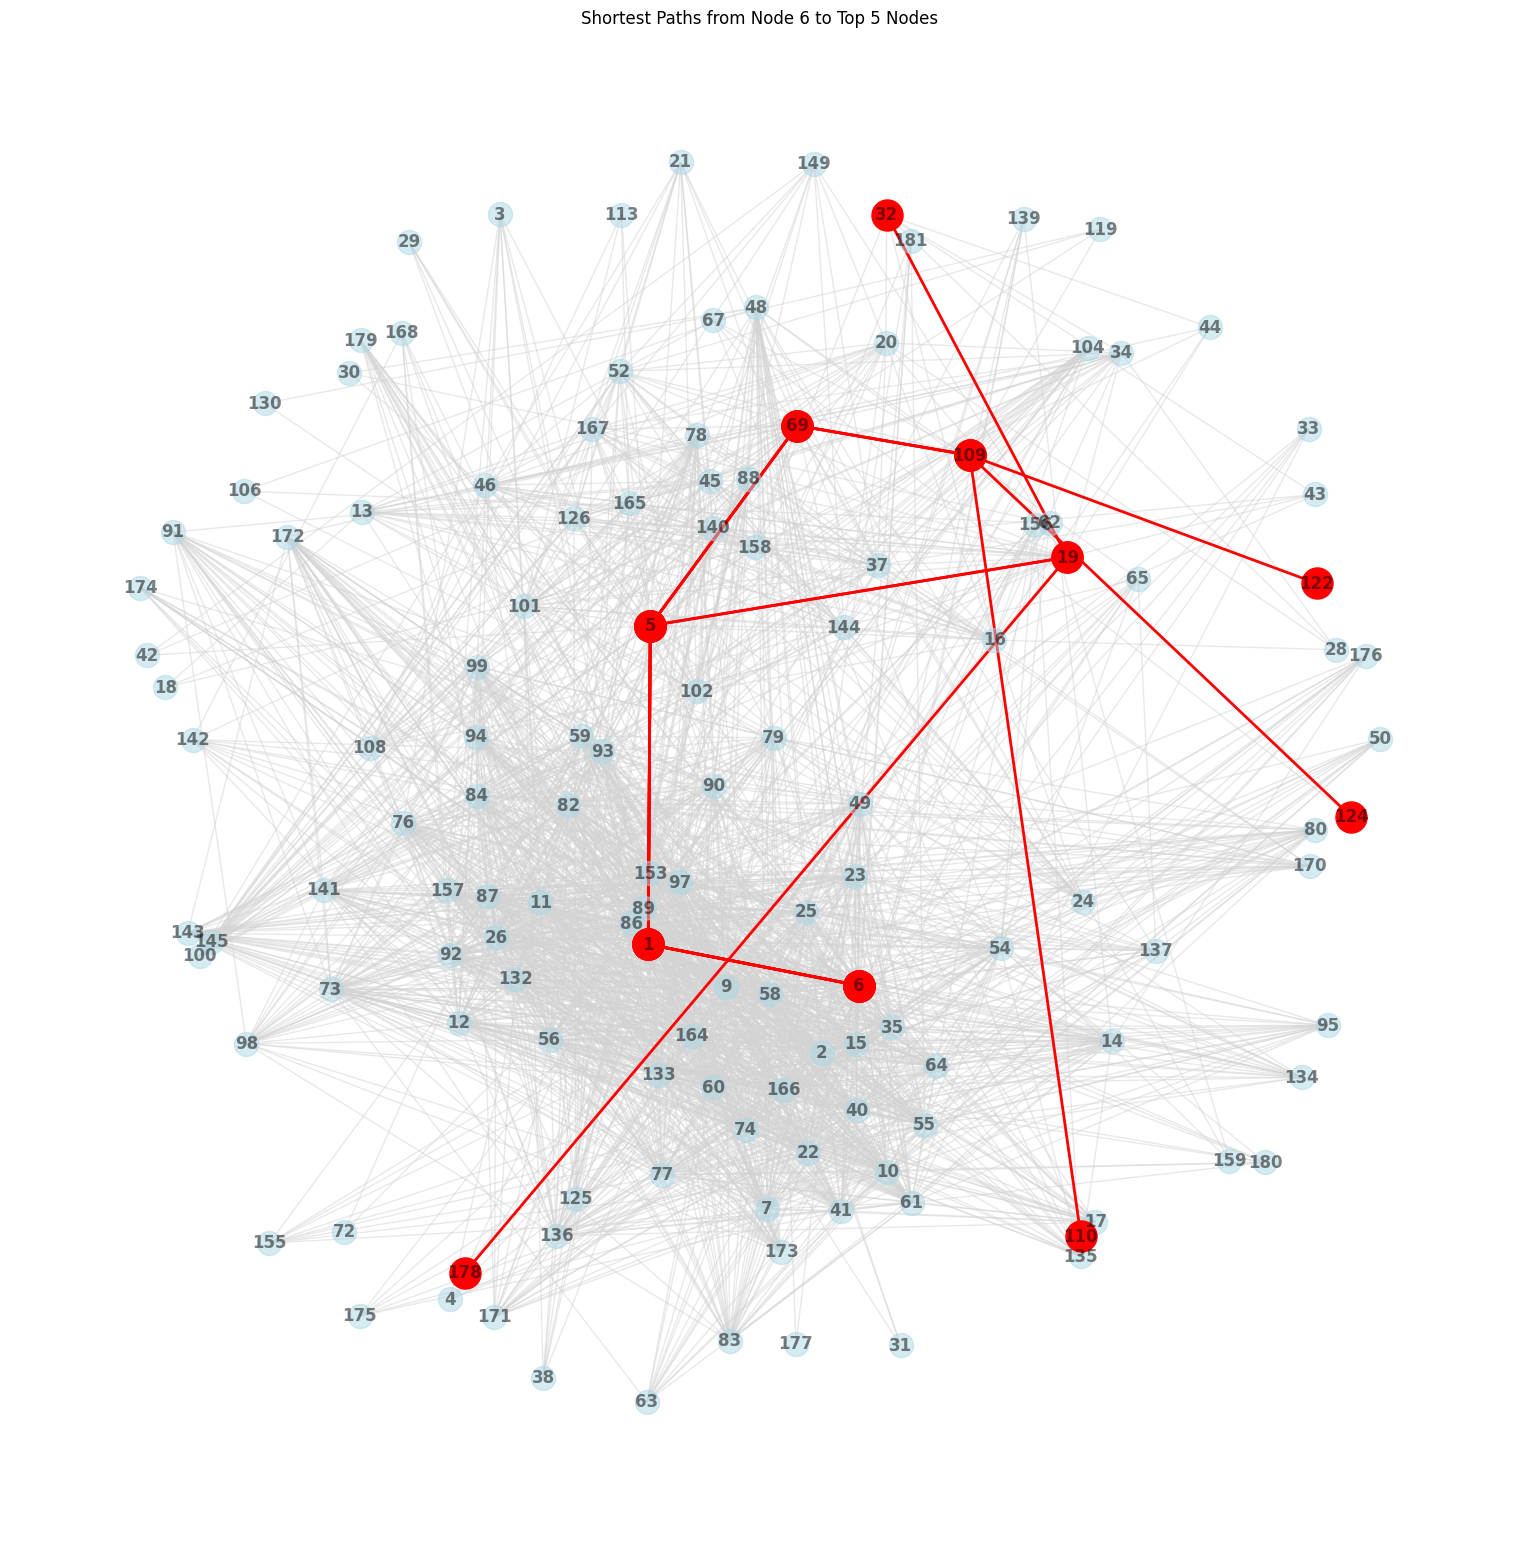

In [64]:
# Select a source node to calculate shortest paths from
source_node = 6  # Replace with your source node

# Calculate the shortest path lengths from the source node to all other nodes
shortest_path_lengths = nx.shortest_path_length(wildbird, source=source_node)

# Convert the shortest path lengths to a DataFrame
shortest_path_df = pd.DataFrame(list(shortest_path_lengths.items()), columns=['Node', 'Shortest Path Length'])

# Find the top 5 nodes with the shortest path lengths
top_5_shortest_paths = shortest_path_df.nlargest(5, 'Shortest Path Length')
print(f"Top 5 nodes with the shortest paths from node {source_node}:")
print(top_5_shortest_paths)

# Visualize the graph with the shortest paths to the top 5 nodes highlighted
pos = nx.spring_layout(wildbird, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(15, 15))  # Increase the figure size

# Draw all nodes and edges
nx.draw(wildbird, pos, with_labels=True, node_color='lightblue', node_size=300, font_weight='bold', 
        edge_color='lightgray', alpha=0.5)

# Highlight the nodes and edges in the shortest paths to the top 5 nodes
for target_node in top_5_shortest_paths['Node']:
    shortest_path = nx.shortest_path(wildbird, source=source_node, target=target_node)
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_nodes(wildbird, pos, nodelist=shortest_path, node_color='red', node_size=500)
    nx.draw_networkx_edges(wildbird, pos, edgelist=path_edges, edge_color='red', width=2)

plt.title(f"Shortest Paths from Node {source_node} to Top 5 Nodes")
plt.show()

In [ ]:
#!pip install geopy

In [ ]:
#!pip install python-louvain

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9448 sha256=30ba1117cc768465605cbb8cfed8516e290ab54791f9011a7af743d578a92359
  Stored in directory: c:\users\banu\appdata\local\pip\cache\wheels\ee\52\54\7ecd0f1ebf5f5a8466f70a27ed2b94d20b955376879d6159c5
Successfully built python-louvain


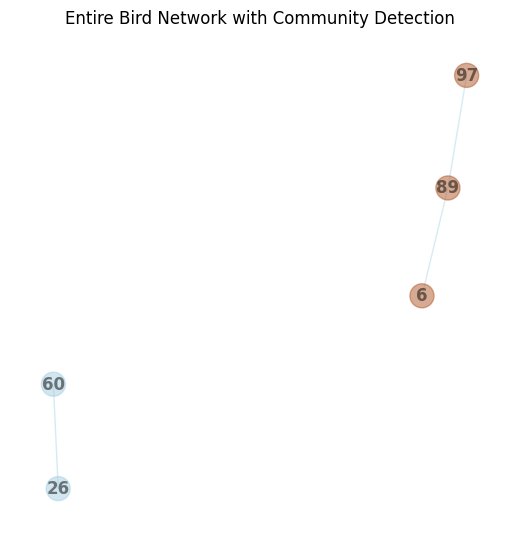


Communities in the entire network:
{6: 1, 89: 1, 26: 0, 60: 0, 97: 1}


In [74]:
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import community as community_louvain  # Import the Louvain method for community detection

# Example data: List of birds with their geographical coordinates (latitude, longitude)
birds_coordinates = [
    (6, (10, 30)),
    (89, (15, 35)),
    (26, (50, 70)),
    (60, (55, 75)),
    (97, (20, 40))
]

# Define the distance threshold for spatial proximity (in kilometers)
distance_threshold = 1000  # Adjust this value based on your criteria

# Function to calculate the distance between two geographical coordinates
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Create the original network based on spatial proximity
G = nx.Graph()

# Add nodes
for bird, _ in birds_coordinates:
    G.add_node(bird)

# Add edges based on spatial proximity
for i in range(len(birds_coordinates)):
    for j in range(i + 1, len(birds_coordinates)):
        bird1, coord1 = birds_coordinates[i]
        bird2, coord2 = birds_coordinates[j]
        distance = calculate_distance(coord1, coord2)
        if distance <= distance_threshold:
            G.add_edge(bird1, bird2)

# Perform community detection on the entire network
partition_entire = community_louvain.best_partition(G)

# Visualize the entire network with community detection
pos = nx.spring_layout(G, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(5, 5))  # Increase the figure size

# Use a colormap to color nodes by community
colors = [partition_entire[node] for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=colors, node_size=300, font_weight='bold', 
        edge_color='lightblue', alpha=0.5, cmap=plt.cm.Paired)
plt.title("Entire Bird Network with Community Detection")
plt.show()


print("\nCommunities in the entire network:")
print(partition_entire)

Degree Centrality:
Bird 6: 0.06666666666666667
Bird 89: 0.13333333333333333
Bird 26: 0.26666666666666666
Bird 60: 0.26666666666666666
Bird 97: 0.13333333333333333
Bird 101: 0.13333333333333333
Bird 102: 0.13333333333333333
Bird 103: 0.13333333333333333
Bird 104: 0.13333333333333333
Bird 105: 0.2
Bird 106: 0.26666666666666666
Bird 107: 0.26666666666666666
Bird 108: 0.2
Bird 109: 0.13333333333333333
Bird 110: 0.13333333333333333
Bird 111: 0.06666666666666667

Closeness Centrality:
Bird 6: 0.1388888888888889
Bird 89: 0.1595744680851064
Bird 26: 0.2830188679245283
Bird 60: 0.2631578947368421
Bird 97: 0.18292682926829268
Bird 101: 0.20833333333333334
Bird 102: 0.234375
Bird 103: 0.25862068965517243
Bird 104: 0.2777777777777778
Bird 105: 0.28846153846153844
Bird 106: 0.2830188679245283
Bird 107: 0.2631578947368421
Bird 108: 0.234375
Bird 109: 0.20270270270270271
Bird 110: 0.1744186046511628
Bird 111: 0.15


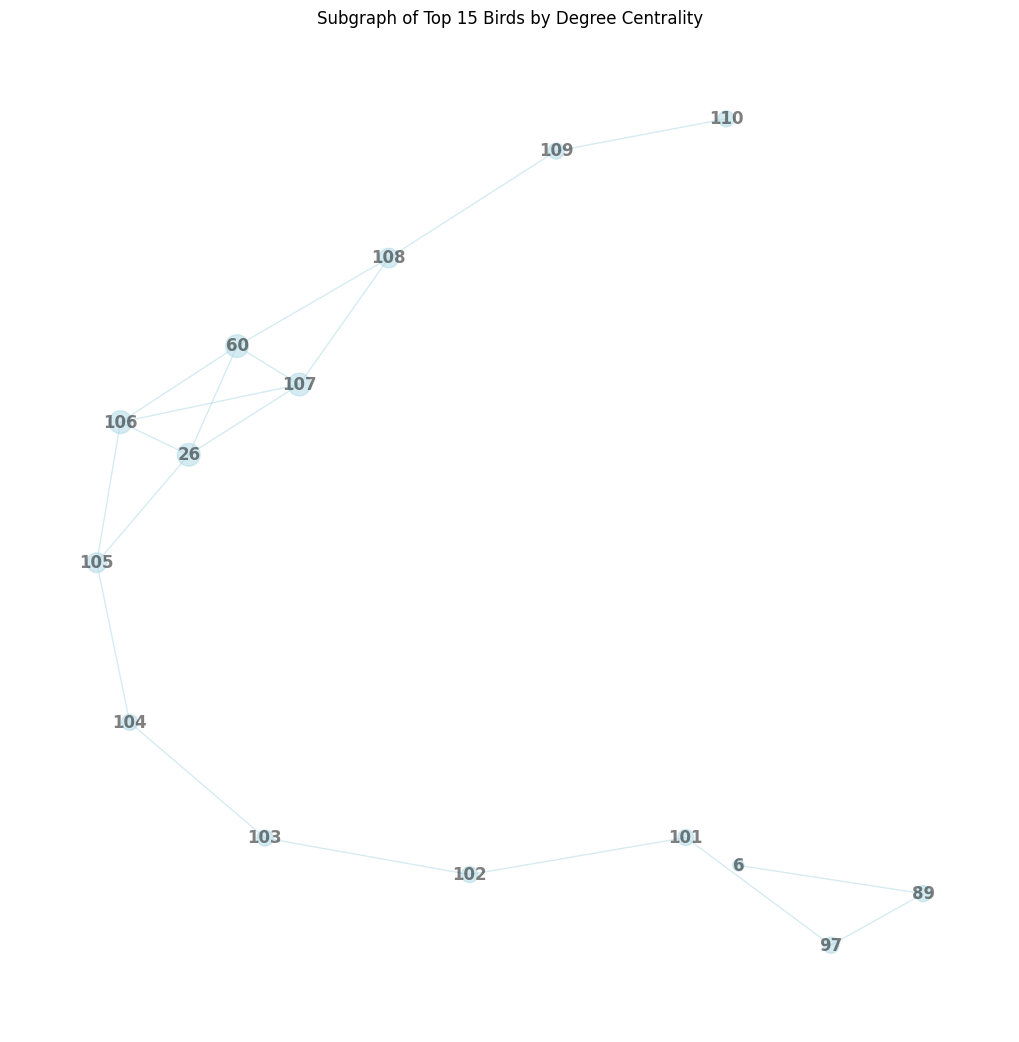

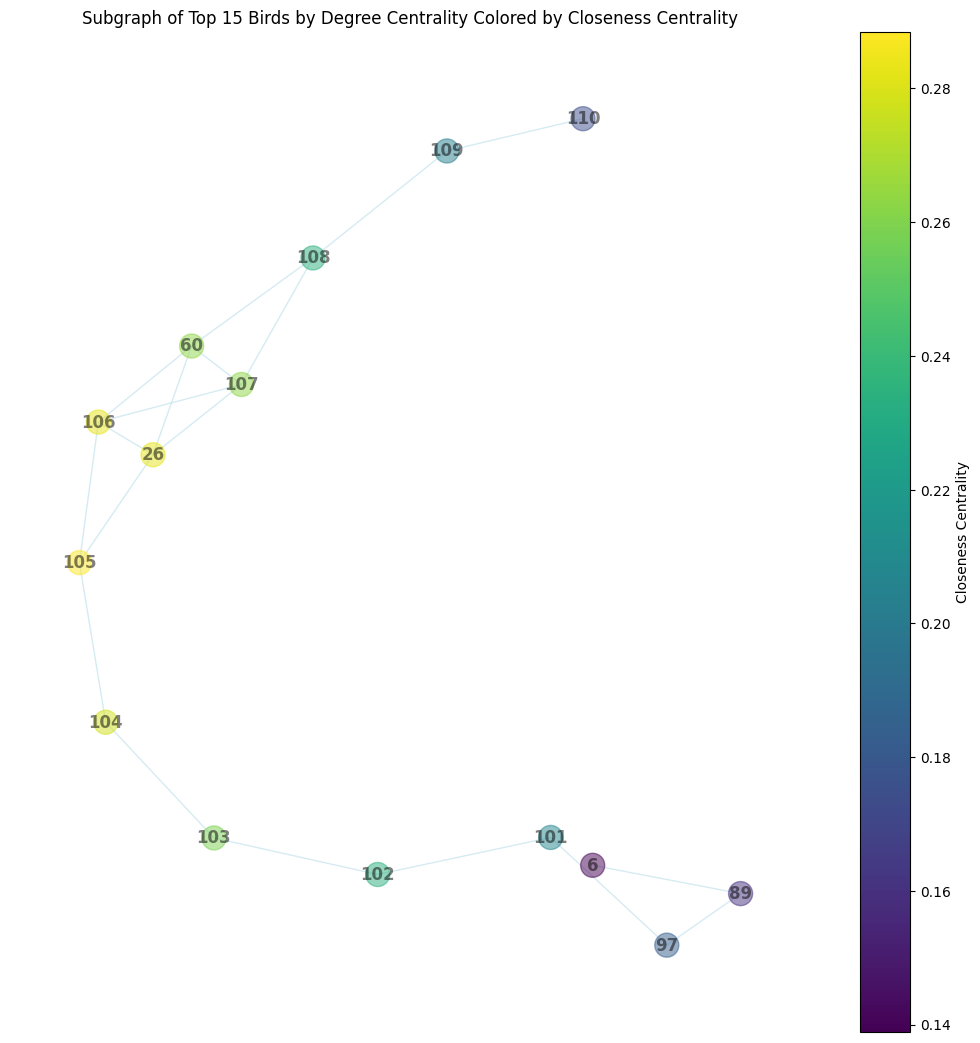

In [83]:
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Example data: List of birds with their geographical coordinates (latitude, longitude)
birds_coordinates = [
    (6, (10, 30)),
    (89, (15, 35)),
    (26, (50, 70)),
    (60, (55, 75)),
    (97, (20, 40)),
    (101, (25, 45)),
    (102, (30, 50)),
    (103, (35, 55)),
    (104, (40, 60)),
    (105, (45, 65)),
    (106, (50, 70)),
    (107, (55, 75)),
    (108, (60, 80)),
    (109, (65, 85)),
    (110, (70, 90)),
    (111, (75, 95))
]

# Define the distance threshold for spatial proximity (in kilometers)
distance_threshold = 1000  # Adjust this value based on your criteria

# Function to calculate the distance between two geographical coordinates
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Create the original network based on spatial proximity
G = nx.Graph()

# Add nodes
for bird, _ in birds_coordinates:
    G.add_node(bird)

# Add edges based on spatial proximity
for i in range(len(birds_coordinates)):
    for j in range(i + 1, len(birds_coordinates)):
        bird1, coord1 = birds_coordinates[i]
        bird2, coord2 = birds_coordinates[j]
        distance = calculate_distance(coord1, coord2)
        if distance <= distance_threshold:
            G.add_edge(bird1, bird2)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Print degree centrality and closeness centrality
print("Degree Centrality:")
for bird, centrality in degree_centrality.items():
    print(f"Bird {bird}: {centrality}")

print("\nCloseness Centrality:")
for bird, centrality in closeness_centrality.items():
    print(f"Bird {bird}: {centrality}")

# Identify the top 15 birds by degree centrality
top_15_birds = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:15]

# Filter the coordinates to include only the top 15 birds
top_15_coordinates = [coord for bird, coord in birds_coordinates if bird in top_15_birds]

# Create a subgraph with the top 15 birds
subgraph = G.subgraph(top_15_birds)

# Visualize the subgraph with nodes sized by degree centrality
pos = nx.spring_layout(subgraph, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(10, 10))  # Increase the figure size

# Use degree centrality to size the nodes
node_sizes = [1000 * degree_centrality[bird] for bird in subgraph.nodes()]

nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, font_weight='bold', 
        edge_color='lightblue', alpha=0.5)
plt.title("Subgraph of Top 15 Birds by Degree Centrality")
plt.show()

# Visualize the subgraph with nodes colored based on closeness centrality
plt.figure(figsize=(10, 10))  # Increase the figure size

# Use closeness centrality to color the nodes
node_colors = [closeness_centrality[bird] for bird in subgraph.nodes()]

# Create a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Only needed for the colorbar

nx.draw(subgraph, pos, with_labels=True, node_color=node_colors, node_size=300, font_weight='bold', 
        edge_color='lightblue', alpha=0.5, cmap=plt.cm.viridis)
plt.title("Subgraph of Top 15 Birds by Degree Centrality Colored by Closeness Centrality")

# Add the colorbar to the plot
cbar = plt.colorbar(sm, ax=plt.gca(), label='Closeness Centrality')
plt.show()